In [1]:
import datetime
import backtrader as bt

Basic Usage
- instantiate indicators w/in Strategy __init__ method
- use/check during next method

Remember
- an indicator declared during __init__will be precalculated before next is called
- Any operation involving lines objects during __init__ generates another lines object
- Any operation involving lines objects during next yields regular Python types like floats and bools.

In [2]:
class MyStrat(bt.Strategy):
    
    def __init__(self):
        self.sma50 = bt.indicators.SimpleMovingAverage(period=10)
        
    def next(self):
        if self.sma50 < self.data.close:
            print('below moving average')
        elif self.sma50 > self.data.close:
            print('above moving average')

In [3]:
# Just to ensure that the strategy runs w/o errors. Nothing indicator specific below 
cerebro = bt.Cerebro(stdstats=False)
cerebro.addstrategy(MyStrat)
data = bt.feeds.GenericCSVData(
    dataname='ETF/uso.csv',
    fromdate=datetime.datetime(2019, 7, 1),
    todate=datetime.datetime(2019, 8, 1),
    nullvalue=0.0,
    dtformat=('%m/%d/%Y'),
    datetime=0,
    high=3,
    low=4,
    open=1,
    close=2,
    volume=5,
    openinterest=-1
)
cerebro.adddata(data)
cerebro.run()

below moving average
above moving average
above moving average
above moving average
above moving average
above moving average
above moving average
above moving average
above moving average
above moving average
below moving average
below moving average
below moving average


<IPython.core.display.Javascript object>


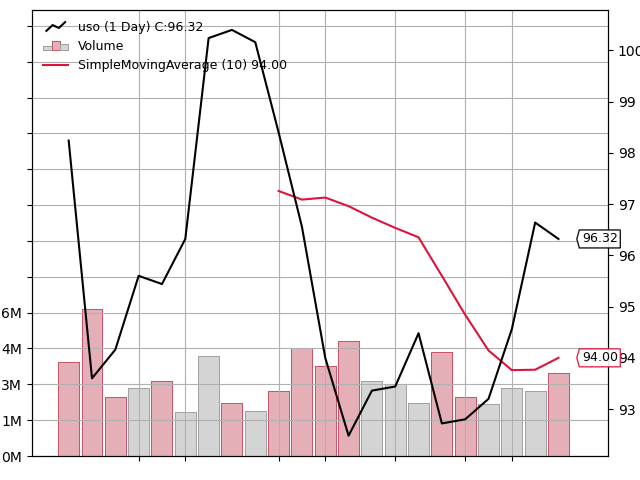

[[<Figure size 640x480 with 2 Axes>]]

In [4]:
cerebro.plot()